<a href="https://colab.research.google.com/github/niklaust/Natural_Language_Processing/blob/main/Introduction_to_spaCy_notebook_of_niklaust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><b>Introduction to spaCy 3</b></center></h1>


github:niklaust

freeCodeCamp: https://www.youtube.com/watch?v=dIUTsFT2MeQ

Resource notebook: http://spacy.pythonhumanities.com/intro.html

teacher : https://github.com/wjbmattingly/freecodecamp_spacy


start 20230209

# **0. hands-on**

track gpu usage in SSH terminal

In [11]:
import os
export = ' && '.join([f'export {name}="{value}"' for name, value in os.environ.items()])
with open("/root/.bashrc", "a") as file_object:
  file_object.write(export)
#
!source /root/.bashrc

download files

In [8]:
import os

if not os.path.exists("data"):
    os.makedirs("data")

In [9]:
import requests

url = "https://api.github.com/repos/wjbmattingly/freecodecamp_spacy/contents/data"

response = requests.get(url)

if response.status_code == 200:
    contents = response.json()
else:
    print("Could not retrieve contents of directory")

In [10]:
for item in contents:
    if item['type'] == 'file':
        file_url = item['download_url']
        file_response = requests.get(file_url)
        if file_response.status_code == 200:
            file_content = file_response.text
            # Save the file to the scratch directory
            with open(os.path.join("data", item['name']), "w") as f:
                f.write(file_content)
        else:
            print(f"Could not download file {item['name']}")

import numpy, pandas libraries

In [11]:
import numpy as np
import pandas as pd

# **1. The Basics of spaCy**

In [12]:
import spacy

In [ ]:
import spacy.cli

spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")      # download english core sm

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


# **2. Linguistic Annotations**

In [ ]:
import spacy

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
with open("/content/data/wiki_us.txt", "r") as f:
  text = f.read()

In [ ]:
# import pprint

# pprint.pprint(text)

In [ ]:
print(text)

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America. It consists of 50 states, a federal district, five major unincorporated territories, 326 Indian reservations, and some minor possessions.[j] At 3.8 million square miles (9.8 million square kilometers), it is the world's third- or fourth-largest country by total area.[d] The United States shares significant land borders with Canada to the north and Mexico to the south, as well as limited maritime borders with the Bahamas, Cuba, and Russia.[22] With a population of more than 331 million people, it is the third most populous country in the world. The national capital is Washington, D.C., and the most populous city is New York.

Paleo-Indians migrated from Siberia to the North American mainland at least 12,000 years ago, and European colonization began in the 16th century. The United States emerged from the thirteen British colonies est

In [ ]:
doc = nlp(text)

In [ ]:
print(doc)

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America. It consists of 50 states, a federal district, five major unincorporated territories, 326 Indian reservations, and some minor possessions.[j] At 3.8 million square miles (9.8 million square kilometers), it is the world's third- or fourth-largest country by total area.[d] The United States shares significant land borders with Canada to the north and Mexico to the south, as well as limited maritime borders with the Bahamas, Cuba, and Russia.[22] With a population of more than 331 million people, it is the third most populous country in the world. The national capital is Washington, D.C., and the most populous city is New York.

Paleo-Indians migrated from Siberia to the North American mainland at least 12,000 years ago, and European colonization began in the 16th century. The United States emerged from the thirteen British colonies est

In [ ]:
print(len(text))   # count every instance of every character
print(len(doc))    # count individual token

3521
654


In [ ]:
for token in text[:10]:
  print(token)

T
h
e
 
U
n
i
t
e
d


In [ ]:
for token in doc[:10]:
  print(token)

The
United
States
of
America
(
U.S.A.
or
USA
)


In [ ]:
for token in text.split()[:10]:
  print(token)

The
United
States
of
America
(U.S.A.
or
USA),
commonly
known


In [ ]:
for i, sent in enumerate(doc.sents):
  print(i, sent)

0 The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America.
1 It consists of 50 states, a federal district, five major unincorporated territories, 326 Indian reservations, and some minor possessions.[j]
2 At 3.8 million square miles (9.8 million square kilometers), it is the world's third- or fourth-largest country by total area.[d]
3 The United States shares significant land borders with Canada to the north and Mexico to the south, as well as limited maritime borders with the Bahamas, Cuba, and Russia.[22] With a population of more than 331 million people, it is the third most populous country in the world.
4 The national capital is Washington, D.C., and the most populous city is New York.


5 Paleo-Indians migrated from Siberia to the North American mainland at least 12,000 years ago, and European colonization began in the 16th century.
6 The United States emerged from the thirteen Briti

In [ ]:
try:
  sentence1 = doc.sents[0]
  print(sentence1)
except:
  print("Error")

Error


In [ ]:
sentence1 = list(doc.sents)[0]
print(sentence1)

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America.


In [ ]:
for token in doc[:10]:
  print(token)

The
United
States
of
America
(
U.S.A.
or
USA
)


In [ ]:
token2 = sentence1[2]
print(token2)

States


In [ ]:
token2.text

'States'

In [ ]:
type(token2)

spacy.tokens.token.Token

In [ ]:
token2.left_edge   

The

In [ ]:
token2.right_edge

,

In [ ]:
token2.ent_type

384

In [ ]:
token2.ent_type_    # GPE Geo Political Entity

'GPE'

In [ ]:
token2.ent_iob_

'I'

In [ ]:
token2.lemma_

'States'

In [ ]:
sentence1[12].lemma_    # lemma_ to find base form verb

'know'

In [ ]:
print(sentence1[12])

known


In [ ]:
token2.morph

Number=Sing

In [ ]:
sentence1[12].morph

Aspect=Perf|Tense=Past|VerbForm=Part

In [ ]:
token2.pos_

'PROPN'

In [ ]:
token2.dep_

'nsubj'

In [ ]:
token2.lang_

'en'

In [ ]:
text = "Mike enjoys playing football."
doc2 = nlp(text)
print(doc2)

Mike enjoys playing football.


In [ ]:
for token in doc2:
  print(token.text, token.pos_, token.dep_)

Mike PROPN nsubj
enjoys VERB ROOT
playing VERB xcomp
football NOUN dobj
. PUNCT punct


In [ ]:
from spacy import displacy

tree = displacy.render(doc2, style="dep")

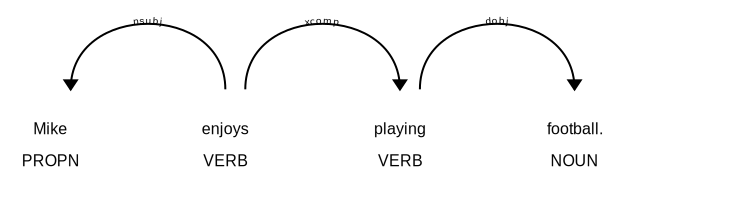

In [ ]:
from IPython.display import SVG, display

display(SVG(tree))

In [ ]:
displacy.render(doc2, style="dep", jupyter=True)

In [ ]:
for ent in doc.ents:
  print(ent.text, ent.label_)

The United States of America GPE
U.S.A. GPE
USA GPE
the United States GPE
U.S. GPE
US GPE
America GPE
North America LOC
50 CARDINAL
five CARDINAL
326 CARDINAL
Indian NORP
3.8 million square miles QUANTITY
9.8 million square kilometers QUANTITY
third- or fourth DATE
The United States GPE
Canada GPE
Mexico GPE
Bahamas GPE
Cuba GPE
more than 331 million CARDINAL
third ORDINAL
Washington GPE
D.C. GPE
New York GPE
Paleo-Indians NORP
Siberia LOC
North American NORP
at least 12,000 years ago DATE
European NORP
the 16th century DATE
The United States GPE
thirteen CARDINAL
British NORP
the East Coast LOC
Great Britain GPE
the American Revolutionary War ORG
1775–1783 CARDINAL
the late 18th century DATE
U.S. GPE
North America LOC
Native Americans NORP
1848 DATE
the United States GPE
United States GPE
the second half of the 19th century DATE
the American Civil War ORG
Spanish NORP
World War EVENT
U.S. GPE
World War II EVENT
the Cold War EVENT
the United States GPE
the Korean War EVENT
the Vietnam 

In [ ]:
displacy.render(doc, style="ent", jupyter=True)

# **3. Word Vectors**

In [ ]:
import spacy 

In [ ]:
import spacy.cli

spacy.cli.download("en_core_web_md")
nlp = spacy.load("en_core_web_md") 

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
with open("/content/data/wiki_us.txt", "r") as f:
  text = f.read()

In [ ]:
doc = nlp(text)
sentence1 = list(doc.sents)[0]
print(sentence1)

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America.


In [ ]:
your_word = "country"

ms = nlp.vocab.vectors.most_similar(
    np.asarray([nlp.vocab.vectors[nlp.vocab.strings[your_word]]]), n=10)

words = [nlp.vocab.strings[w] for w in ms[0][0]]
distances = ms[2]
print(words)

['country—0,467', 'nationâ\x80\x99s', 'countries-', 'continente', 'Carnations', 'pastille', 'бесплатно', 'Argents', 'Tywysogion', 'Teeters']


In [ ]:
doc1 = nlp("I like salty fries and hamburgers.")
doc2 = nlp("Fast food tastes very good.")

In [ ]:
print(doc1, "<->", doc2, doc1.similarity(doc2))

I like salty fries and hamburgers. <-> Fast food tastes very good. 0.691649353055761


In [ ]:
doc3 = nlp("The Empire State Building is in New York.")

In [ ]:
print(doc1, "<->", doc3, doc1.similarity(doc3))

I like salty fries and hamburgers. <-> The Empire State Building is in New York. 0.1766669125394067


In [ ]:
doc4 = nlp("I enjoy oranges.")     
doc5 = nlp("I enjoy applpes.")

In [ ]:
print(doc4, "<->", doc5, doc4.similarity(doc5))  # they are in the same cluster of fruits

I enjoy oranges. <-> I enjoy applpes. 0.9734628736186025


In [ ]:
doc6 = nlp("I enjoy burgers.")

In [ ]:
print(doc4, "<->", doc6, doc4.similarity(doc6)) # not in the same cluster

I enjoy oranges. <-> I enjoy burgers. 0.9628306772893752


In [ ]:
french_fries =  doc1[2:4]
burgers = doc1[5]
print(french_fries, "<->", burgers, french_fries.similarity(burgers))

salty fries <-> hamburgers 0.6938489675521851


# **4. spaCy's Pipelines** 

In [ ]:
import spacy

In [ ]:
nlp = spacy.blank("en")

In [ ]:
nlp.add_pipe("sentencizer")

In [ ]:
import requests
from bs4 import BeautifulSoup

s = requests.get("https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt")
soup = BeautifulSoup(s.content).text.replace("-\n", "").replace("\n", " ")
nlp.max_length = 5278439

In [ ]:
%%time
doc = nlp(soup)
print(len(list(doc.sents)))

94134
CPU times: user 13.2 s, sys: 242 ms, total: 13.5 s
Wall time: 13.8 s


In [ ]:
nlp2 = spacy.load("en_core_web_sm")
nlp2.max_length = 5278439

In [ ]:
# run out of ram
# %%time
# doc = nlp2(soup)
# print(len(list(doc.sents)))

In [ ]:
nlp.analyze_pipes()

{'summary': {'sentencizer': {'assigns': ['token.is_sent_start', 'doc.sents'],
   'requires': [],
   'scores': ['sents_f', 'sents_p', 'sents_r'],
   'retokenizes': False}},
 'problems': {'sentencizer': []},
 'attrs': {'doc.sents': {'assigns': ['sentencizer'], 'requires': []},
  'token.is_sent_start': {'assigns': ['sentencizer'], 'requires': []}}}

In [ ]:
nlp2 = spacy.load("en_core_web_sm")

In [ ]:
nlp2.analyze_pipes()

{'summary': {'tok2vec': {'assigns': ['doc.tensor'],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'tagger': {'assigns': ['token.tag'],
   'requires': [],
   'scores': ['tag_acc'],
   'retokenizes': False},
  'parser': {'assigns': ['token.dep',
    'token.head',
    'token.is_sent_start',
    'doc.sents'],
   'requires': [],
   'scores': ['dep_uas',
    'dep_las',
    'dep_las_per_type',
    'sents_p',
    'sents_r',
    'sents_f'],
   'retokenizes': False},
  'attribute_ruler': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'lemmatizer': {'assigns': ['token.lemma'],
   'requires': [],
   'scores': ['lemma_acc'],
   'retokenizes': False},
  'ner': {'assigns': ['doc.ents', 'token.ent_iob', 'token.ent_type'],
   'requires': [],
   'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_per_type'],
   'retokenizes': False}},
 'problems': {'tok2vec': [],
  'tagger': [],
  'parser': [],
  'attribute_ruler': [],
  'lemmatizer': [],
  'ner': []},
 'att

# **5. Using SpaCy's EntityRuler** 

In [ ]:
import spacy

In [ ]:
import spacy.cli

spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm") 

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
text = "West Chestertenfieldville was referenced in Mr. Deeds."

In [ ]:
doc = nlp(text)

In [ ]:
for ent in doc.ents:
  print(ent.text, ent.label_)

West Chestertenfieldville GPE
Deeds PERSON


In [ ]:
ruler = nlp.add_pipe("entity_ruler")

In [ ]:
nlp.analyze_pipes()

{'summary': {'tok2vec': {'assigns': ['doc.tensor'],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'tagger': {'assigns': ['token.tag'],
   'requires': [],
   'scores': ['tag_acc'],
   'retokenizes': False},
  'parser': {'assigns': ['token.dep',
    'token.head',
    'token.is_sent_start',
    'doc.sents'],
   'requires': [],
   'scores': ['dep_uas',
    'dep_las',
    'dep_las_per_type',
    'sents_p',
    'sents_r',
    'sents_f'],
   'retokenizes': False},
  'attribute_ruler': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'lemmatizer': {'assigns': ['token.lemma'],
   'requires': [],
   'scores': ['lemma_acc'],
   'retokenizes': False},
  'ner': {'assigns': ['doc.ents', 'token.ent_iob', 'token.ent_type'],
   'requires': [],
   'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_per_type'],
   'retokenizes': False},
  'entity_ruler': {'assigns': ['doc.ents', 'token.ent_type', 'token.ent_iob'],
   'requires': [],
   'scores': ['ents_f', 'ent

In [ ]:
patterns = [
    {"label": "GPE", "pattern": "West Chestertenfieldville"}
]

In [ ]:
ruler.add_patterns(patterns)

In [ ]:
doc2 = nlp(text)
for ent in doc2.ents:
  print(ent.text, ent.label_)

West Chestertenfieldville GPE
Deeds PERSON


In [ ]:
nlp2 = spacy.load("en_core_web_sm")

In [ ]:
ruler = nlp2.add_pipe("entity_ruler", before="ner")

In [ ]:
ruler.add_patterns(patterns)

In [ ]:
nlp2.analyze_pipes()

{'summary': {'tok2vec': {'assigns': ['doc.tensor'],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'tagger': {'assigns': ['token.tag'],
   'requires': [],
   'scores': ['tag_acc'],
   'retokenizes': False},
  'parser': {'assigns': ['token.dep',
    'token.head',
    'token.is_sent_start',
    'doc.sents'],
   'requires': [],
   'scores': ['dep_uas',
    'dep_las',
    'dep_las_per_type',
    'sents_p',
    'sents_r',
    'sents_f'],
   'retokenizes': False},
  'attribute_ruler': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'lemmatizer': {'assigns': ['token.lemma'],
   'requires': [],
   'scores': ['lemma_acc'],
   'retokenizes': False},
  'entity_ruler': {'assigns': ['doc.ents', 'token.ent_type', 'token.ent_iob'],
   'requires': [],
   'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_per_type'],
   'retokenizes': False},
  'ner': {'assigns': ['doc.ents', 'token.ent_iob', 'token.ent_type'],
   'requires': [],
   'scores': ['ents_f', 'ent

In [ ]:
doc = nlp2(text)

In [ ]:
for ent in doc.ents:
  print(ent.text, ent.label_)

West Chestertenfieldville GPE
Deeds PERSON


In [ ]:
nlp3 = spacy.load("en_core_web_sm")

In [ ]:
ruler = nlp3.add_pipe("entity_ruler", before="ner")

In [ ]:
patterns = [
    {"label": "GPE", "pattern": "West Chestertenfieldville"},
    {"label": "FILM", "pattern": "Mr. Deeds"}
]

In [ ]:
ruler.add_patterns(patterns)

In [ ]:
doc = nlp3(text)

In [ ]:
for ent in doc.ents:
  print(ent.text, ent.label_)

West Chestertenfieldville GPE
Mr. Deeds FILM


toponym resolution

Paris

# **6. How to use the spaCy Matcher**

In [ ]:
import spacy  
from spacy.matcher import Matcher

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
matcher = Matcher(nlp.vocab)
pattern = [{"LIKE_EMAIL": True}]
matcher.add("EMAIL_ADDRESS", [pattern])

In [ ]:
doc = nlp("This is an email address: abc123@xxx.com")
matches = matcher(doc)

In [ ]:
print(matches)        #[(Lexeme, start token, end token)]

[(16571425990740197027, 6, 7)]


In [ ]:
print(nlp.vocab[matches[0][0]].text)

EMAIL_ADDRESS


In [ ]:
with open("/content/data/wiki_mlk.txt", "r") as f:
  text = f.read()

In [ ]:
import pprint

pprint.pprint(text)

('Martin Luther King Jr. (born Michael King Jr.; January 15, 1929 – April 4, '
 '1968) was an American Baptist minister and activist who became the most '
 'visible spokesman and leader in the American civil rights movement from 1955 '
 'until his assassination in 1968. King advanced civil rights through '
 'nonviolence and civil disobedience, inspired by his Christian beliefs and '
 'the nonviolent activism of Mahatma Gandhi. He was the son of early civil '
 'rights activist and minister Martin Luther King Sr.\n'
 '\n'
 "King participated in and led marches for blacks' right to vote, "
 'desegregation, labor rights, and other basic civil rights.[1] King led the '
 '1955 Montgomery bus boycott and later became the first president of the '
 'Southern Christian Leadership Conference (SCLC). As president of the SCLC, '
 'he led the unsuccessful Albany Movement in Albany, Georgia, and helped '
 'organize some of the nonviolent 1963 protests in Birmingham, Alabama. King '
 'helped organize 

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
matcher = Matcher(nlp.vocab)
pattern = [{"POS": "PROPN"}]
matcher.add("PROPER_NOUN", [pattern])
doc = nlp(text)
matches = matcher(doc)
print(len(matches))
for match in matches[:10]:
  print(match, doc[match[1]:match[2]])

103
(451313080118390996, 0, 1) Martin
(451313080118390996, 1, 2) Luther
(451313080118390996, 2, 3) King
(451313080118390996, 3, 4) Jr.
(451313080118390996, 6, 7) Michael
(451313080118390996, 7, 8) King
(451313080118390996, 8, 9) Jr.
(451313080118390996, 10, 11) January
(451313080118390996, 15, 16) April
(451313080118390996, 49, 50) King


In [ ]:
matcher = Matcher(nlp.vocab)
pattern = [{"POS": "PROPN", "OP": "+"}]
matcher.add("PROPER_NOUN", [pattern])
doc = nlp(text)
matches = matcher(doc)
print(len(matches))
for match in matches[:10]:
  print(match, doc[match[1]:match[2]])

176
(451313080118390996, 0, 1) Martin
(451313080118390996, 0, 2) Martin Luther
(451313080118390996, 1, 2) Luther
(451313080118390996, 0, 3) Martin Luther King
(451313080118390996, 1, 3) Luther King
(451313080118390996, 2, 3) King
(451313080118390996, 0, 4) Martin Luther King Jr.
(451313080118390996, 1, 4) Luther King Jr.
(451313080118390996, 2, 4) King Jr.
(451313080118390996, 3, 4) Jr.


In [ ]:
matcher = Matcher(nlp.vocab)
pattern = [{"POS": "PROPN", "OP": "+"}]
matcher.add("PROPER_NOUN", [pattern], greedy="LONGEST")
doc = nlp(text)
matches = matcher(doc)
print(len(matches))
for match in matches[:10]:
  print(match, doc[match[1]:match[2]])

62
(451313080118390996, 83, 88) Martin Luther King Sr.
(451313080118390996, 469, 474) Martin Luther King Jr. Day
(451313080118390996, 536, 541) Martin Luther King Jr. Memorial
(451313080118390996, 0, 4) Martin Luther King Jr.
(451313080118390996, 128, 132) Southern Christian Leadership Conference
(451313080118390996, 247, 251) Director J. Edgar Hoover
(451313080118390996, 6, 9) Michael King Jr.
(451313080118390996, 325, 328) Nobel Peace Prize
(451313080118390996, 422, 425) James Earl Ray
(451313080118390996, 463, 466) Congressional Gold Medal


In [ ]:
matcher = Matcher(nlp.vocab)
pattern = [{"POS": "PROPN", "OP": "+"}]
matcher.add("PROPER_NOUN", [pattern], greedy="LONGEST")
doc = nlp(text)
matches = matcher(doc)
matches.sort(key = lambda x: x[1])
print(len(matches))
for match in matches[:10]:
  print(match, doc[match[1]:match[2]])

62
(451313080118390996, 0, 4) Martin Luther King Jr.
(451313080118390996, 6, 9) Michael King Jr.
(451313080118390996, 10, 11) January
(451313080118390996, 15, 16) April
(451313080118390996, 49, 50) King
(451313080118390996, 69, 71) Mahatma Gandhi
(451313080118390996, 83, 88) Martin Luther King Sr.
(451313080118390996, 89, 90) King
(451313080118390996, 113, 114) King
(451313080118390996, 117, 118) Montgomery


In [ ]:
matcher = Matcher(nlp.vocab)
pattern = [{"POS": "PROPN", "OP": "+"}, {"POS": "VERB"}]
matcher.add("PROPER_NOUN", [pattern], greedy="LONGEST")
doc = nlp(text)
matches = matcher(doc)
print(len(matches))
for match in matches[:10]:
  print(match, doc[match[1]:match[2]])

8
(451313080118390996, 247, 252) Director J. Edgar Hoover considered
(451313080118390996, 485, 488) United States beginning
(451313080118390996, 49, 51) King advanced
(451313080118390996, 89, 91) King participated
(451313080118390996, 113, 115) King led
(451313080118390996, 167, 169) King helped
(451313080118390996, 198, 200) SCLC put
(451313080118390996, 322, 324) King won


In [ ]:
import json

with open("/content/data/alice.json", "r") as f:
  data = json.load(f)

In [ ]:
text = data[0][2][0]
pprint.pprint(text)

('Alice was beginning to get very tired of sitting by her sister on the bank, '
 'and of having nothing to do: once or twice she had peeped into the book her '
 'sister was reading, but it had no pictures or conversations in it, `and what '
 "is the use of a book,' thought Alice `without pictures or conversation?'")


In [ ]:
text = text.replace("`", "'")
pprint.pprint(text)

('Alice was beginning to get very tired of sitting by her sister on the bank, '
 'and of having nothing to do: once or twice she had peeped into the book her '
 "sister was reading, but it had no pictures or conversations in it, 'and what "
 "is the use of a book,' thought Alice 'without pictures or conversation?'")


In [ ]:
matcher = Matcher(nlp.vocab)
pattern = [{"ORTH":"'"},
           {"IS_ALPHA": True, "OP": "+"},
           {"IS_PUNCT": True, "OP": "*"},
           {"ORTH":"'"}
           ]
matcher.add("PROPER_NOUN", [pattern], greedy="LONGEST")
doc = nlp(text)
matches = matcher(doc)
print(len(matches))
for match in matches[:10]:
  print(match, doc[match[1]:match[2]])

2
(451313080118390996, 47, 58) 'and what is the use of a book,'
(451313080118390996, 60, 67) 'without pictures or conversation?'


In [ ]:
speak_lemmas = ["think", "say"]
matcher = Matcher(nlp.vocab)
pattern = [{"ORTH":"'"},
           {"IS_ALPHA": True, "OP": "+"},
           {"IS_PUNCT": True, "OP": "*"},
           {"ORTH":"'"},
           {"POS": "VERB", "LEMMA": {"IN": speak_lemmas}},
           {"POS": "PROPN", "OP": "+"},
           {"ORTH":"'"},
           {"IS_ALPHA": True, "OP": "+"},
           {"IS_PUNCT": True, "OP": "*"},
           {"ORTH":"'"},
           ]
matcher.add("PROPER_NOUN", [pattern], greedy="LONGEST")
doc = nlp(text)
matches = matcher(doc)
print(len(matches))
for match in matches[:10]:
  print(match, doc[match[1]:match[2]])

1
(451313080118390996, 47, 67) 'and what is the use of a book,' thought Alice 'without pictures or conversation?'


In [ ]:
for text in data[0][2]:
  text = text.replace("`", "'")
  doc = nlp(text)
  matches = matcher(doc)
  print(len(matches))
  matches.sort(key = lambda x: x[1])
  for match in matches[:10]:
    print(match, doc[match[1]:match[2]])

1
(451313080118390996, 47, 67) 'and what is the use of a book,' thought Alice 'without pictures or conversation?'
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [ ]:
speak_lemmas = ["think", "say"]
text = data[0][2][0].replace( "`", "'")
matcher = Matcher(nlp.vocab)
pattern1 = [{'ORTH': "'"}, {'IS_ALPHA': True, "OP": "+"}, {'IS_PUNCT': True, "OP": "*"}, {'ORTH': "'"}, {"POS": "VERB", "LEMMA": {"IN": speak_lemmas}}, {"POS": "PROPN", "OP": "+"}, {'ORTH': "'"}, {'IS_ALPHA': True, "OP": "+"}, {'IS_PUNCT': True, "OP": "*"}, {'ORTH': "'"}]
pattern2 = [{'ORTH': "'"}, {'IS_ALPHA': True, "OP": "+"}, {'IS_PUNCT': True, "OP": "*"}, {'ORTH': "'"}, {"POS": "VERB", "LEMMA": {"IN": speak_lemmas}}, {"POS": "PROPN", "OP": "+"}]
pattern3 = [{"POS": "PROPN", "OP": "+"},{"POS": "VERB", "LEMMA": {"IN": speak_lemmas}}, {'ORTH': "'"}, {'IS_ALPHA': True, "OP": "+"}, {'IS_PUNCT': True, "OP": "*"}, {'ORTH': "'"}]
matcher.add("PROPER_NOUNS", [pattern1, pattern2, pattern3], greedy='LONGEST')
for text in data[0][2]:
    text = text.replace("`", "'")
    doc = nlp(text)
    matches = matcher(doc)
    matches.sort(key = lambda x: x[1])
    print (len(matches))
    for match in matches[:10]:
        print (match, doc[match[1]:match[2]])

1
(3232560085755078826, 47, 67) 'and what is the use of a book,' thought Alice 'without pictures or conversation?'
0
0
0
0
0
1
(3232560085755078826, 0, 6) 'Well!' thought Alice
0
0
0
0
0
0
0
1
(3232560085755078826, 57, 68) 'which certainly was not here before,' said Alice
0
0


# **7. Custom Components in spaCy**

In [13]:
import spacy

In [14]:
import spacy.cli

spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm") 

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [15]:
doc = nlp("Britain is a place. Mary is a doctor.")

In [16]:
for ent in doc.ents:
  print(ent.text, ent.label_)

Britain GPE
Mary PERSON


In [17]:
from spacy.language import Language

In [18]:
@Language.component("remove_gpe")
def remove_gpe(doc):
  original_ents = list(doc.ents)
  for ent in doc.ents:
    if ent.label_ == "GPE":
      original_ents.remove(ent)
  doc.ents = original_ents
  return (doc)

In [19]:
nlp.add_pipe("remove_gpe")

<function __main__.remove_gpe(doc)>

In [20]:
nlp.analyze_pipes()

{'summary': {'tok2vec': {'assigns': ['doc.tensor'],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'tagger': {'assigns': ['token.tag'],
   'requires': [],
   'scores': ['tag_acc'],
   'retokenizes': False},
  'parser': {'assigns': ['token.dep',
    'token.head',
    'token.is_sent_start',
    'doc.sents'],
   'requires': [],
   'scores': ['dep_uas',
    'dep_las',
    'dep_las_per_type',
    'sents_p',
    'sents_r',
    'sents_f'],
   'retokenizes': False},
  'attribute_ruler': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'lemmatizer': {'assigns': ['token.lemma'],
   'requires': [],
   'scores': ['lemma_acc'],
   'retokenizes': False},
  'ner': {'assigns': ['doc.ents', 'token.ent_iob', 'token.ent_type'],
   'requires': [],
   'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_per_type'],
   'retokenizes': False},
  'remove_gpe': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False}},
 'problems': {'tok2vec': [],
  

In [21]:
doc = nlp("Britain is a place. Mary is a doctor.")
for ent in doc.ents:
  print(ent.text, ent.label_)

Mary PERSON


In [23]:
# save to disk
nlp.to_disk("/content/data/new_en_core_web_sm")

# **8. Using RegEx with spaCy**

# **9. Working with Multi-Word Token Entities and RegEx**

In [1]:
import re

In [2]:
text = "Paul Newman was an American actor, but Paul Hollywood is a British TV Host. The name Paul is quite common."

In [3]:
pattern = r"Paul [A-Z]\w+"

In [4]:
matches = re.finditer(pattern, text)
for match in matches:
  print(match)

<re.Match object; span=(0, 11), match='Paul Newman'>
<re.Match object; span=(39, 53), match='Paul Hollywood'>


In [ ]:
import spacy 
from spacy.tokens import Span

In [6]:
nlp = spacy.blank("en")
doc = nlp(text)
original_ents = list(doc.ents)
mwt_ents = []
for match in re.finditer(pattern, doc.text):
  start, end = match.span()
  span = doc.char_span(start, end)
  print(span)
  if span is not None:
    mwt_ents.append((span.start, span.end, span.text))
for ent in mwt_ents:
  start, end, name = ent
  per_ent = Span(doc, start, end, label="PERSON")
  original_ents.append(per_ent)
doc.ents = original_ents
for ent in doc.ents:
  print(ent.text, ent.label_)

Paul Newman
Paul Hollywood
Paul Newman PERSON
Paul Hollywood PERSON


In [7]:
print(mwt_ents)

[(0, 2, 'Paul Newman'), (8, 10, 'Paul Hollywood')]


In [12]:
from spacy.language import Language

@Language.component("paul_ner")
def paul_ner(doc):
  pattern = r"Paul [A-Z]\w+"
  original_ents = list(doc.ents)
  mwt_ents = []
  for match in re.finditer(pattern, doc.text):
    start, end = match.span()
    span = doc.char_span(start, end)
    if span is not None:
      mwt_ents.append((span.start, span.end, span.text))
  for ent in mwt_ents:
    start, end, name = ent
    per_ent = Span(doc, start, end, label="PERSON")
    original_ents.append(per_ent)
  doc.ents = original_ents
  return doc

In [13]:
nlp2 = spacy.blank("en")
nlp2.add_pipe("paul_ner")

<function __main__.paul_ner(doc)>

In [14]:
doc2 = nlp2(text)
print(doc2.ents)

(Paul Newman, Paul Hollywood)


In [16]:
@Language.component("cinema_ner")
def paul_ner(doc):
  pattern = r"Hollywood"
  original_ents = list(doc.ents)
  mwt_ents = []
  for match in re.finditer(pattern, doc.text):
    start, end = match.span()
    span = doc.char_span(start, end)
    if span is not None:
      mwt_ents.append((span.start, span.end, span.text))
  for ent in mwt_ents:
    start, end, name = ent
    per_ent = Span(doc, start, end, label="CINEMA")
    original_ents.append(per_ent)
  doc.ents = original_ents
  return doc

In [24]:
nlp3 = spacy.load("en_core_web_sm")
nlp3.add_pipe("cinema_ner")

<function __main__.paul_ner(doc)>

In [22]:
from spacy.util import filter_spans

filtered = filter_spans(original_ents)
doc.ents = filtered
for ent in doc.ents:
    print(ent.text, ent.label_)

Paul Newman PERSON
Paul Hollywood PERSON


# **10. Financial Analysis with spaCy**

In [25]:
import spacy 
import pandas as pd

In [27]:
df = pd.read_csv("/content/data/stocks.tsv", sep='\t')

In [29]:
display(df)

,Symbol,CompanyName,Industry,MarketCap
0,A,Agilent Technologies,Life Sciences Tools & Services,53.65B
1,AA,Alcoa,Metals & Mining,9.25B
2,AAC,Ares Acquisition,Shell Companies,1.22B
3,AACG,ATA Creativity Global,Diversified Consumer Services,90.35M
4,AADI,Aadi Bioscience,Pharmaceuticals,104.85M
...,...,...,...,...
5874,ZWRK,Z-Work Acquisition,Shell Companies,278.88M
5875,ZY,Zymergen,Chemicals,1.31B
5876,ZYME,Zymeworks,Biotechnology,1.50B
5877,ZYNE,Zynerba Pharmaceuticals,Pharmaceuticals,184.39M


In [30]:
symbols = df.Symbol.tolist()
companies = df.CompanyName.tolist()
print(symbols[:10])

['A', 'AA', 'AAC', 'AACG', 'AADI', 'AAIC', 'AAL', 'AAMC', 'AAME', 'AAN']


In [46]:
df2 = pd.read_csv("/content/data/indexes.tsv", sep="\t")
display(df2)

,IndexName,IndexSymbol
0,Dow Jones Industrial Average,DJIA
1,Dow Jones Transportation Average,DJT
2,Dow Jones Utility Average Index,DJU
3,NASDAQ 100 Index (NASDAQ Calculation),NDX
4,NASDAQ Composite Index,COMP
5,NYSE Composite Index,NYA
6,S&P 500 Index,SPX
7,S&P 400 Mid Cap Index,MID
8,S&P 100 Index,OEX
9,NASDAQ Computer Index,IXCO


In [47]:
indexes = df2.IndexName.tolist()
index_symbols = df2.IndexSymbol.tolist()

In [55]:
df3 = pd.read_csv("/content/data/stock_exchanges.tsv", sep="\t")
display(df3)

,BloombergExchangeCode,BloombergCompositeCode,Country,Description,ISOMIC,Google Prefix,EODcode,NumStocks
0,AF,AR,Argentina,Bolsa de Comercio de Buenos Aires,XBUE,NaN,BA,12
1,AO,AU,Australia,National Stock Exchange of Australia,XNEC,NaN,NaN,1
2,AT,AU,Australia,Asx - All Markets,XASX,ASX,AU,875
3,AV,NaN,Austria,Wiener Boerse Ag,XWBO,VIE,VI,38
4,BI,NaN,Bahrain,Bahrain Bourse,XBAH,NaN,NaN,4
...,...,...,...,...,...,...,...,...
97,UR,US,USA,NASDAQ Capital Market,XNCM,NASDAQ,US,"2,209"
98,UV,US,USA,OTC markets,OOTC,OTCMKTS,US,"2,433"
99,UW,US,USA,NASDAQ Global Select,XNGS,NASDAQ,US,"1,768"
100,VH,VN,Vietnam,Hanoi Stock Exchange,HSTC,NaN,NaN,4


In [58]:
exchanges = df3.ISOMIC.tolist()+df3["Google Prefix"].tolist()+df3.Description.tolist()
print(exchanges[:10])

['XBUE', 'XNEC', 'XASX', 'XWBO', 'XBAH', 'XDHA', 'XBRU', 'BVMF', 'XCNQ', 'XTSE']


In [59]:
stops = ["two"]
nlp = spacy.blank("en")
ruler = nlp.add_pipe("entity_ruler")
letters = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
patterns = []
for symbol in symbols:
  patterns.append({"label": "STOCK", "pattern": symbol})
  for l in letters:
    patterns.append({"label": "STOCK", "pattern": symbol+f".{l}"})
for company in companies:
  if company not in stops:
   patterns.append({"label": "COMPANY", "pattern": company})

for index in indexes:
  patterns.append({"label": "INDEX", "pattern": index})
  words = index.split()
  patterns.append({"label": "INDEX", "pattern": " ".join(words[:2])})

for index in index_symbols:
  patterns.append({"label": "INDEX", "pattern": symbol})

for e in exchanges:
  patterns.append({"label": "STOCK_EXCHANGE", "pattern": e})

ruler.add_patterns(patterns)

In [60]:
doc = nlp(text)
for ent in doc.ents:
  print(ent.text, ent.label_)

Apple COMPANY
Apple COMPANY
AAPL.O STOCK
Apple COMPANY
Nasdaq COMPANY
S&P 500 INDEX
S&P 500 INDEX
ET STOCK
Dow Jones Industrial Average INDEX
S&P 500 INDEX
Nasdaq COMPANY
S&P 500 INDEX
JD.com COMPANY
TME.N STOCK
NIO.N STOCK
Kroger COMPANY
KR.N STOCK
NYSE STOCK_EXCHANGE
Nasdaq COMPANY
Nasdaq COMPANY


In [33]:
#source: https://www.reuters.com/business/futures-rise-after-biden-xi-call-oil-bounce-2021-09-10/
text = '''
Sept 10 (Reuters) - Wall Street's main indexes were subdued on Friday as signs of higher inflation and a drop in Apple shares following an unfavorable court ruling offset expectations of an easing in U.S.-China tensions.

Data earlier in the day showed U.S. producer prices rose solidly in August, leading to the biggest annual gain in nearly 11 years and indicating that high inflation was likely to persist as the pandemic pressures supply chains. read more .

"Today's data on wholesale prices should be eye-opening for the Federal Reserve, as inflation pressures still don't appear to be easing and will likely continue to be felt by the consumer in the coming months," said Charlie Ripley, senior investment strategist for Allianz Investment Management.

Apple Inc (AAPL.O) fell 2.7% following a U.S. court ruling in "Fortnite" creator Epic Games' antitrust lawsuit that stroke down some of the iPhone maker's restrictions on how developers can collect payments in apps.


Sponsored by Advertising Partner
Sponsored Video
Watch to learn more
Report ad
Apple shares were set for their worst single-day fall since May this year, weighing on the Nasdaq (.IXIC) and the S&P 500 technology sub-index (.SPLRCT), which fell 0.1%.

Sentiment also took a hit from Cleveland Federal Reserve Bank President Loretta Mester's comments that she would still like the central bank to begin tapering asset purchases this year despite the weak August jobs report. read more

Investors have paid keen attention to the labor market and data hinting towards higher inflation recently for hints on a timeline for the Federal Reserve to begin tapering its massive bond-buying program.

The S&P 500 has risen around 19% so far this year on support from dovish central bank policies and re-opening optimism, but concerns over rising coronavirus infections and accelerating inflation have lately stalled its advance.


Report ad
The three main U.S. indexes got some support on Friday from news of a phone call between U.S. President Joe Biden and Chinese leader Xi Jinping that was taken as a positive sign which could bring a thaw in ties between the world's two most important trading partners.

At 1:01 p.m. ET, the Dow Jones Industrial Average (.DJI) was up 12.24 points, or 0.04%, at 34,891.62, the S&P 500 (.SPX) was up 2.83 points, or 0.06%, at 4,496.11, and the Nasdaq Composite (.IXIC) was up 12.85 points, or 0.08%, at 15,261.11.

Six of the eleven S&P 500 sub-indexes gained, with energy (.SPNY), materials (.SPLRCM) and consumer discretionary stocks (.SPLRCD) rising the most.

U.S.-listed Chinese e-commerce companies Alibaba and JD.com , music streaming company Tencent Music (TME.N) and electric car maker Nio Inc (NIO.N) all gained between 0.7% and 1.4%


Report ad
Grocer Kroger Co (KR.N) dropped 7.1% after it said global supply chain disruptions, freight costs, discounts and wastage would hit its profit margins.

Advancing issues outnumbered decliners by a 1.12-to-1 ratio on the NYSE and by a 1.02-to-1 ratio on the Nasdaq.

The S&P index recorded 14 new 52-week highs and three new lows, while the Nasdaq recorded 49 new highs and 38 new lows.
'''

In [36]:
from spacy import displacy

In [51]:
doc = nlp(text)
for ent in doc.ents:
  print(ent.text, ent.label_)
# displacy.render(doc, style="ent", jupyter=True)

Apple COMPANY
Apple COMPANY
AAPL.O STOCK
Apple COMPANY
Nasdaq COMPANY
ET STOCK
Dow Jones Industrial Average INDEX
Nasdaq COMPANY
JD.com COMPANY
TME.N STOCK
NIO.N STOCK
Kroger COMPANY
KR.N STOCK
Nasdaq COMPANY
Nasdaq COMPANY
